# 1. First Approach to the Dataset

## 1.1. Environment Setup and Python Libraries Installation

- **Nilearn:** to facilitate the processing and visualization of neuroimaging data.
- **Matplotlib and Seaborn:** for data visualization.
- **Numpy and Pandas:** for data manipulation and analysis.

In [1]:
!pip install nilearn numpy pandas matplotlib seaborn

## 1.2. Data Loading

We established the file path using the os library and loaded the downloaded ".1D" files using numpy.

In [8]:
import nibabel as nib
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os
import json

"""
Las siguientes líneas de código deben modificarse para correr desde un contenedor Docker
"""

# Ruta de la carpeta actual (donde está el notebook)
current_folder = os.getcwd()

parent_folder = os.path.dirname(current_folder)

# Ruta relativa al archivo .nii.gz
relative_path = r'Dataset_ROIs_AAL_CCS_filt_noglobal/Pitt_0050009_rois_aal.1D'

# Construir la ruta completa usando os.path.join
file_path = os.path.join(parent_folder, relative_path)

time_series_data = np.loadtxt(file_path)

# Display the shape of the loaded data
print("Shape of the loaded data array:", time_series_data.shape)

print(time_series_data)


Shape of the loaded data array: (195, 116)
[[ 6995.32617188  9607.71191406  5701.07714844 ...  7463.98730469
   8975.8203125  10110.29882812]
 [ 6995.08642578  9607.68066406  5700.9921875  ...  7463.93017578
   8975.484375   10110.15429688]
 [ 6999.81005859  9608.16015625  5710.21386719 ...  7470.1640625
   8995.99609375 10128.8359375 ]
 ...
 [ 7000.00927734  9616.44042969  5702.01513672 ...  7466.78515625
   8983.59863281 10101.61523438]
 [ 6999.41992188  9614.89257812  5705.56884766 ...  7472.609375
   9013.29296875 10116.49414062]
 [ 6998.52734375  9611.11230469  5706.17871094 ...  7476.05175781
   9033.57617188 10131.01660156]]


## 1.3. Visualize the DataWe can visualize the rs-fMRI signal of on subject to get an initial understanding of the data.

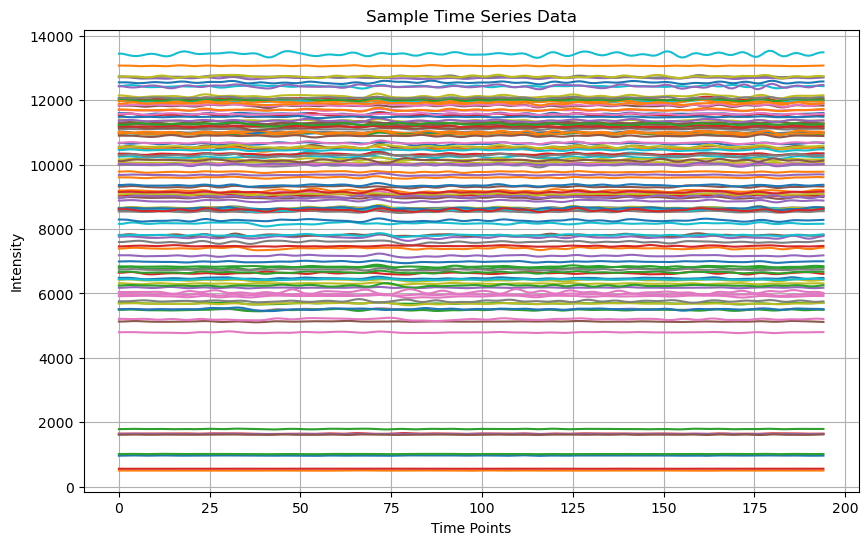

In [7]:
# Plotting the time series data
plt.figure(figsize=(10, 6))
plt.plot(time_series_data)
plt.xlabel('Time Points')
plt.ylabel('Intensity')
plt.title('Sample Time Series Data')
plt.grid(True)
plt.show()

# 1.4. Individual Correlation matrix

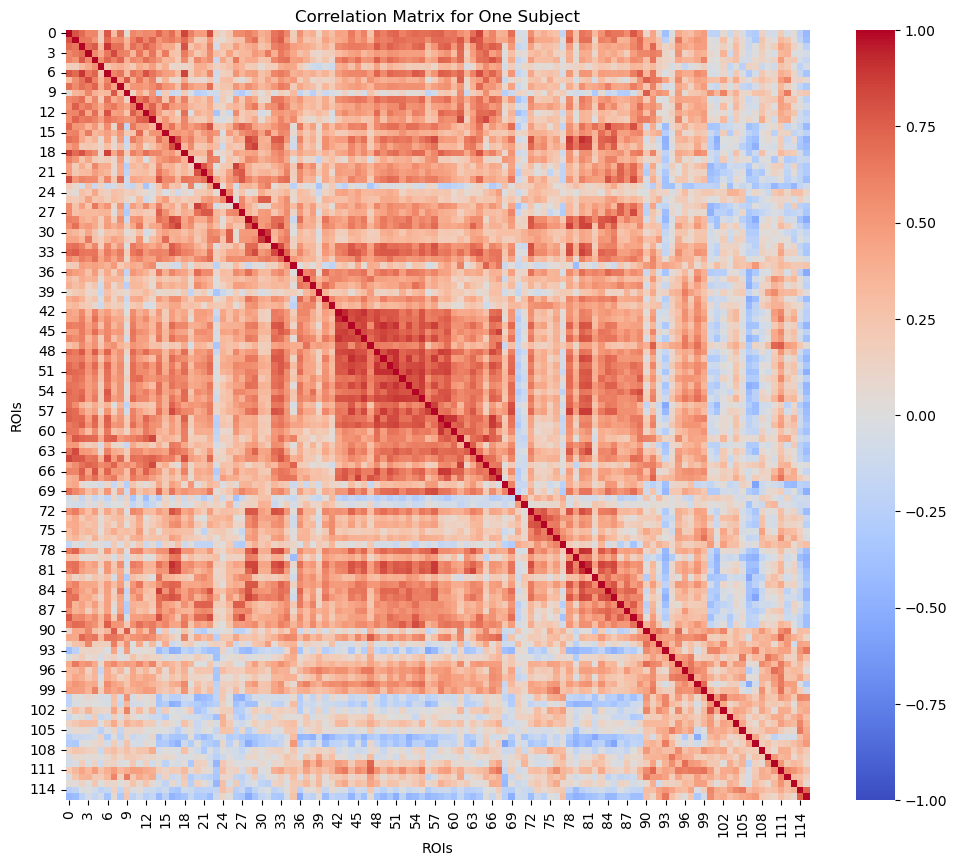

In [53]:
# Calculate the correlation matrix
correlation_matrix = np.corrcoef(time_series_data.T)  # Transpose so that rows represent different ROIs

# Plot the correlation matrix using a heatmap
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=False, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Correlation Matrix for One Subject')
plt.xlabel('ROIs')
plt.ylabel('ROIs')
plt.show()

# 2. Loop to create the initial DataFrame

In [9]:
# Obtener la ruta del directorio actual y el directorio padre
current_folder = os.getcwd()
parent_folder = os.path.dirname(current_folder)

# Definir el archivo CSV y su ruta
csv_file = 'Phenotypic_V1_0b_preprocessed1.csv'
csv_path = os.path.join(current_folder, csv_file)

# Cargar el archivo CSV en un DataFrame
df = pd.read_csv(csv_path, sep=";")

# Inicializar una lista para almacenar las matrices de correlación
correlation_matrices = []

# Recorrer cada fila del DataFrame y calcular la matriz de correlación
for index, row in df.iterrows():
    file_id_value = row['FILE_ID']
    relative_path = f'Dataset_ROIs_AAL_CCS_filt_noglobal/{file_id_value}_rois_aal.1D'
    file_path = os.path.join(parent_folder, relative_path)
    
    # Verificar si el archivo existe
    if os.path.exists(file_path):
        # Cargar los datos de la serie temporal
        time_series_data = np.loadtxt(file_path)
        # Calcular la matriz de correlación
        correlation_matrix = np.corrcoef(time_series_data.T)
        # Convertir la matriz de correlación en una cadena JSON
        correlation_matrix_json = json.dumps(correlation_matrix.tolist())
    else:
        correlation_matrix_json = json.dumps([])  # Si no existe, poner una lista vacía
    
    # Agregar la cadena JSON a la lista
    correlation_matrices.append(correlation_matrix_json)

# Agregar la nueva columna de matrices de correlación al DataFrame
df['Correlation_Matrix'] = correlation_matrices

# Guardar el DataFrame actualizado en un nuevo archivo CSV
output_file_path = os.path.join(parent_folder, 'output_file.csv')
df.to_csv(output_file_path, index=False)

print("CSV actualizado y guardado correctamente.")



/home/agustinnr/miniconda3/lib/python3.12/site-packages/numpy/lib/function_base.py:2897: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]
/home/agustinnr/miniconda3/lib/python3.12/site-packages/numpy/lib/function_base.py:2898: RuntimeWarning: invalid value encountered in divide
  c /= stddev[None, :]


CSV actualizado y guardado correctamente.
